<a href="https://colab.research.google.com/github/iam-pattan/Fuzzy_and_GANs/blob/main/CTGAN_Synthetic_data_generation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Dataset
Free "synthea" open-source health datasets are used. 

## Install Dependencies

https://github.com/sdv-dev/CTGAN

To use CTGAN do a pip install. Also, we will be installing the `table_evaluator` library([link](https://pypi.org/project/table-evaluator/)) which will help us in comparing the results with the original data. 

In [ ]:
# !wget https://storage.googleapis.com/synthea-public/synthea_sample_data_csv_apr2020.zip
# !unzip synthea_sample_data_csv_apr2020.zip

In [ ]:
!pip install ctgan
!pip install table_evaluator

In [ ]:
!wget 'https://myfirstlearningbucket.s3.ap-south-1.amazonaws.com/GAN_data.csv'

--2021-04-20 10:28:16--  https://myfirstlearningbucket.s3.ap-south-1.amazonaws.com/GAN_data.csv
Resolving myfirstlearningbucket.s3.ap-south-1.amazonaws.com (myfirstlearningbucket.s3.ap-south-1.amazonaws.com)... 52.219.62.71
Connecting to myfirstlearningbucket.s3.ap-south-1.amazonaws.com (myfirstlearningbucket.s3.ap-south-1.amazonaws.com)|52.219.62.71|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1013 [text/csv]
Saving to: ‘GAN_data.csv’

GAN_data.csv        100%[===================>]    1013  --.-KB/s    in 0s      

2021-04-20 10:28:17 (46.7 MB/s) - ‘GAN_data.csv’ saved [1013/1013]



## Data preprocessing
Remove unnecessary columns and encode all data

In [ ]:
import pandas as pd

# data = pd.read_csv('csv/patients.csv')
# data.drop(['Id', 'BIRTHDATE', 'DEATHDATE', 'SSN', 'DRIVERS', 'PASSPORT', 'PREFIX',
      #  'FIRST', 'ADDRESS', 'LAST', 'SUFFIX', 'MAIDEN','LAT', 'LON',], axis=1, inplace=True)

load_data = pd.read_csv('/content/GAN_data.csv')
data = load_data.drop(['Unnamed: 0','M1', 'M2', 'M3'], axis=1)
data.head(10)

,Temperature,Grinding Time,Initial Weight,Final Weight,Water added,min,sec,W1,W2,W3
0,100,40,100,36.0,40,20,0,50,50,0
1,300,40,120,53.0,20,11,0,50,50,0
2,300,20,100,25.0,20,14,0,70,30,0
3,600,30,100,58.0,0,5,0,60,40,0
4,800,20,98,42.0,0,4,0,20,80,0
5,1600,32,100,84.4,0,17,21,80,0,20
6,1600,19,50,42.0,0,13,32,40,0,10
7,1800,31,100,87.3,0,14,49,80,0,20
8,1800,20,50,39.2,0,10,57,40,0,10
9,2000,34,100,82.5,0,12,6,80,0,20


In [ ]:
data.columns

Index(['Temperature', 'Grinding Time', 'Initial Weight', 'Final Weight',
       'Water added', 'min', 'sec', 'W1', 'W2', 'W3'],
      dtype='object')

In [ ]:
# categorical_features = ['MARITAL', 'RACE', 'ETHNICITY', 'GENDER', 'BIRTHPLACE', 'CITY', 'STATE', 'COUNTY', 'ZIP']
discrete_features = ['Temperature', 'Grinding Time', 'Initial Weight', 'Water added', 'W1', 'W2', 'W3']

## Training the model and generating samples
 

In [ ]:
from ctgan import CTGANSynthesizer

ctgan = CTGANSynthesizer(verbose=True)
ctgan.fit(data, discrete_features, epochs = 1000)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:72: FutureWarning: Pass n_components=10 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  "will result in an error", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:72: FutureWarning: Pass n_components=10 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  "will result in an error", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:72: FutureWarning: Pass n_components=10 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  "will result in an error", FutureWarning)


Epoch 1, Loss G:  1.7680,Loss D: -0.0168
Epoch 2, Loss G:  1.7521,Loss D:  0.0028
Epoch 3, Loss G:  1.7683,Loss D: -0.0364
Epoch 4, Loss G:  1.7362,Loss D: -0.0234
Epoch 5, Loss G:  1.7188,Loss D: -0.0422
Epoch 6, Loss G:  1.6574,Loss D: -0.0648
Epoch 7, Loss G:  1.6767,Loss D: -0.0535
Epoch 8, Loss G:  1.6997,Loss D: -0.0612
Epoch 9, Loss G:  1.5904,Loss D: -0.0569
Epoch 10, Loss G:  1.6752,Loss D: -0.0602
Epoch 11, Loss G:  1.6507,Loss D: -0.0583
Epoch 12, Loss G:  1.6299,Loss D: -0.0856
Epoch 13, Loss G:  1.6285,Loss D: -0.0845
Epoch 14, Loss G:  1.5688,Loss D: -0.1140
Epoch 15, Loss G:  1.5335,Loss D: -0.0905
Epoch 16, Loss G:  1.5354,Loss D: -0.1118
Epoch 17, Loss G:  1.5498,Loss D: -0.1092
Epoch 18, Loss G:  1.4373,Loss D: -0.1543
Epoch 19, Loss G:  1.4889,Loss D: -0.1230
Epoch 20, Loss G:  1.3634,Loss D: -0.1281
Epoch 21, Loss G:  1.4931,Loss D: -0.1426
Epoch 22, Loss G:  1.3032,Loss D: -0.1488
Epoch 23, Loss G:  1.2520,Loss D: -0.1284
Epoch 24, Loss G:  1.2064,Loss D: -0.0568
E

We simply call model's `sample` function to generate samples based on the learned model. In this example we generate 500 samples. 

In [ ]:
samples = ctgan.sample(200)

In [ ]:
pd.DataFrame(data = samples).head(10)

,Temperature,Grinding Time,Initial Weight,Final Weight,Water added,min,sec,W1,W2,W3
0,1600,30,50,53.096608,0,0,24,10,0,40
1,1600,34,50,90.047728,0,1,29,20,0,80
2,100,20,98,42.482296,40,13,-33,20,80,0
3,100,20,100,49.014585,0,13,-16,40,80,0
4,1600,34,100,95.106093,0,16,15,20,0,80
5,600,35,100,81.208681,0,14,-7,20,0,80
6,2000,31,100,88.397261,0,15,10,80,0,80
7,300,20,100,33.678370,40,12,29,70,50,0
8,2000,35,100,98.608604,0,11,9,20,0,20
9,1800,32,50,35.998512,0,5,34,10,0,40


## Evaluation

CTGANs `table_evaluator` library to compare the features. 

We call the `visual_evaluation` method to compare the actual data(`data`) and the generated data(`samples`).

(22, 10) (200, 10)


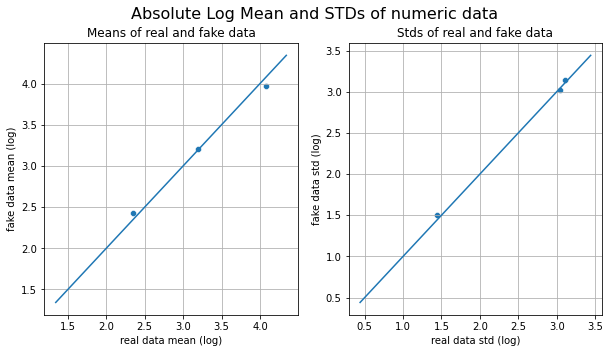

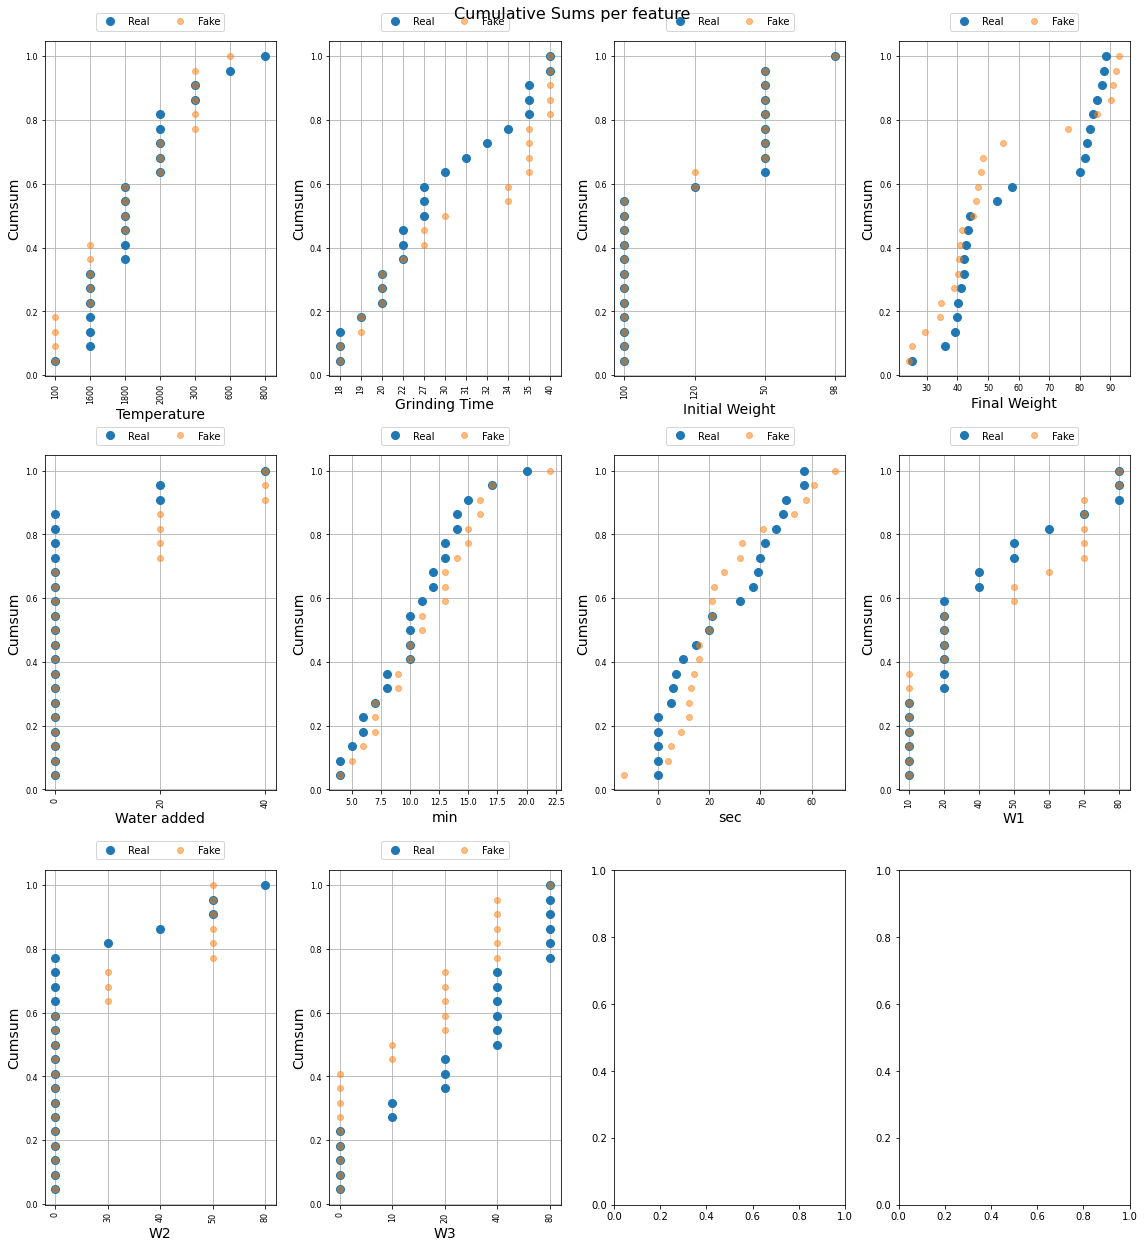

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

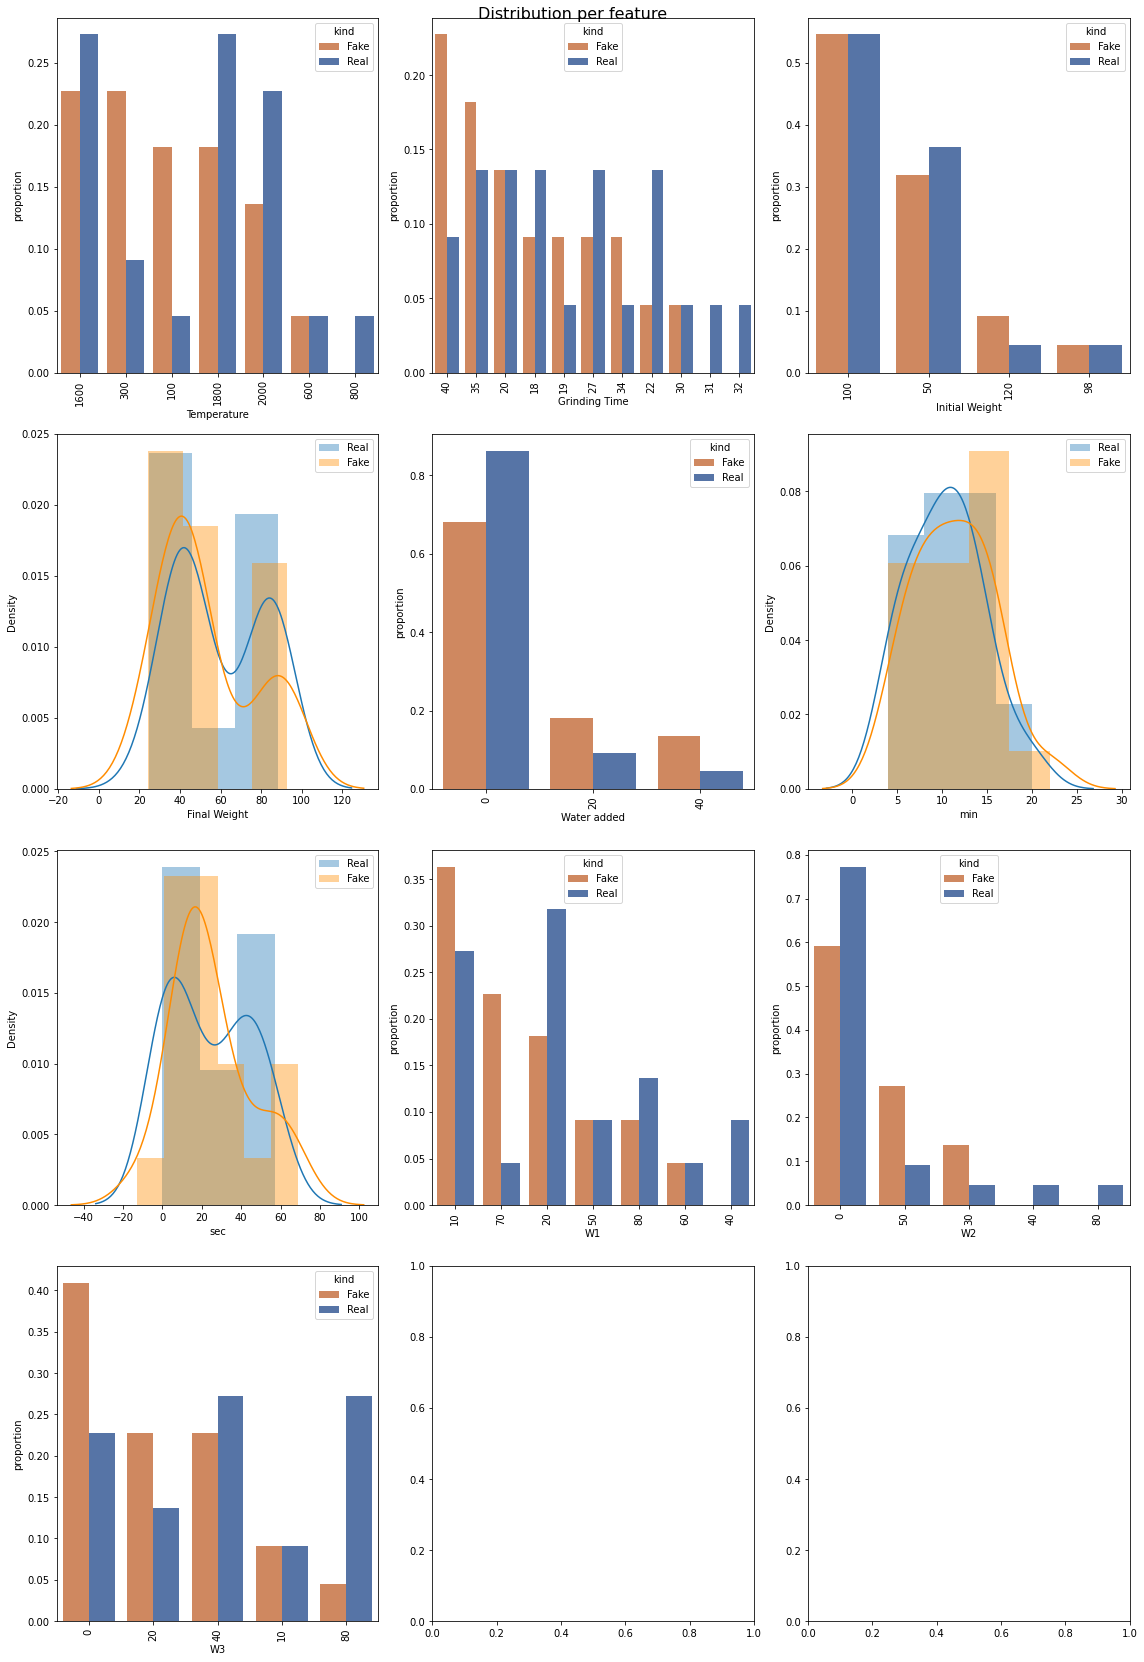

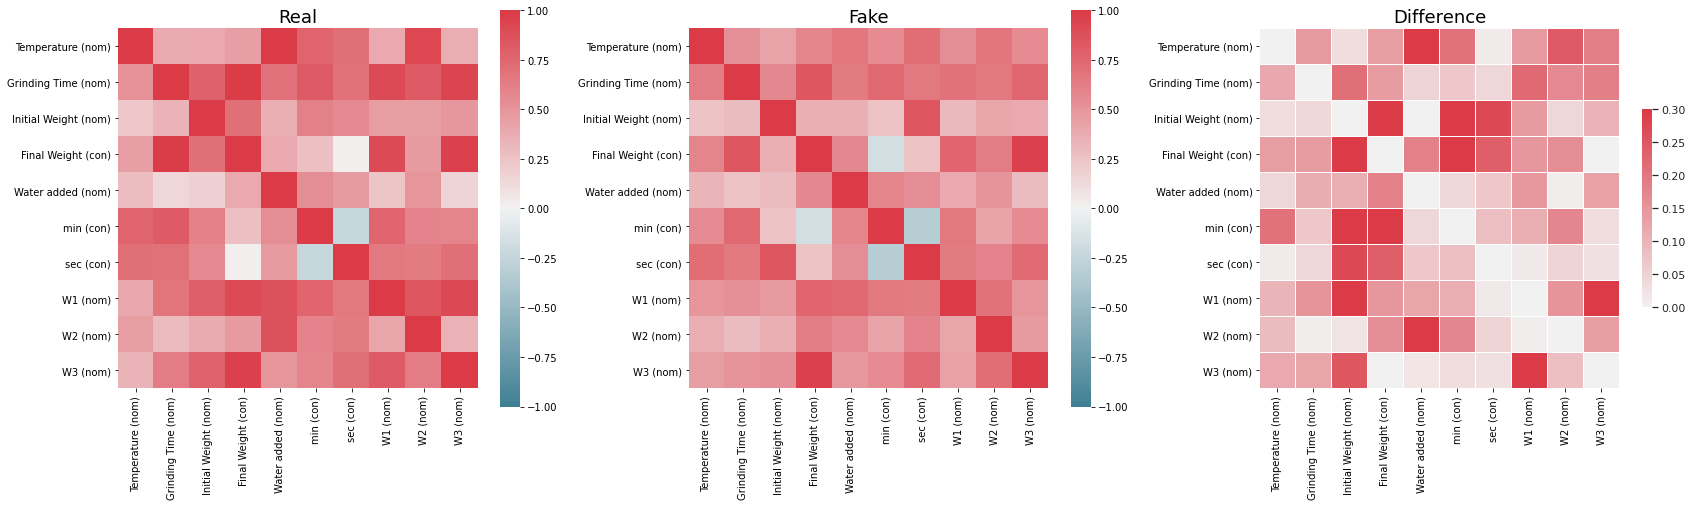

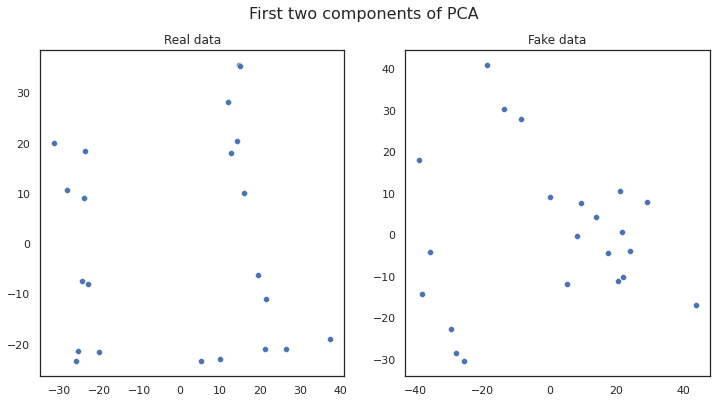

In [ ]:
from table_evaluator import load_data, TableEvaluator

print(data.shape, samples.shape)
table_evaluator =  TableEvaluator(data, samples, cat_cols= discrete_features)

table_evaluator.visual_evaluation()

## Conclusion

As its apparent from the visualizations, the similarity between the original data and the synthetic data is quite high. The results give a lot of confidence as we took a random dataset and applied the default implementation without any 
tweaks or any data preprocessing


The model can be used in various scenarios where data augmentation is required. Its worthwhile to highlight a few caveats:
- In this dataset we just had categorical and continuous variables and the results were quite good. 
- It would be useful to try it on datasets with date time values
- Also this model won't be able to handle relational datasets by default. For eg. there's no way of specifiying primary key foreign key constraints. 
- Moreover, it cannot handle contraints by default. For eg. a particular state should belong to a single country but there's no way of specifying this constraint. The generated dataset can contain new combinations of (state, country) which is not present in the original dataset. 

There's a framework to mitigate some of the above issues. Checkout [SDV](https://sdv.dev/SDV/) if you are interested. I will try to write a post about it in future.


Credits: Vivek Maskara